# Analysis of financial time series data via an ensemble from an LSTM neural network, an ARIMA model and a standard Random Forest

A **time-series** is an ordered sequence of observations the temporal dependence of which reveals trend, seasonality and shock propagation. The goal of time series analysis is to investigate the path of observations of time series and to build models to describe the structure of data and then to predict the future values of the series. When the observations are asset prices, returns or liquidity metrics it becomes a **financial time series**, forming the empirical base of valuation, risk control, and policy surveillance.

**Linear models** such as **ARIMA** offer statistical transparency but assume stationarity and short-range memory, constraints routinely violated by markets that exhibit regime shifts, volatility clustering and non-linear feedback. **Deep-learning approaches**, especially **recurrent neural networks (RNNs)**, discard these assumptions by learning high-order, non-linear mappings directly from data.

The **Long Short-Term Memory (LSTM)** architecture augments RNNs with gated cells that preserve information over hundreds of lags, enabling it to capture dynamics that ARIMA cannot without manual lag inflation or hybrid extensions (like an ARIMA-GARCH stack). (Note that GARCH stands f) Empirical studies show well-regularised LSTMs deliver lower forecast error and more coherent risk estimates than such hybrid models, particularly when heterogeneous signals (i.e. information beyond the raw price series like order flow, macro news, technical factors etc.) are fed into the network. Nonetheless, their performance hinges on ample data, robust cross-validation and strict out-of-sample testing.

Despite their limitations, **ARIMA models** remain foundational in time series forecasting due to their interpretability, fast estimation and suitability for short-memory processes. They provide a reliable benchmark and often outperform more complex models on small or well-behaved datasets, especially when domain-specific tuning (e.g. differencing, AIC selection etc.) is applied.

On the other hand, a **Random Forest** is an ensemble‐learning algorithm that builds a large collection of decision-tree regressors, each trained on a bootstrapped sample of the data and a random subset of input features and averages their predictions to produce a robust, low-variance forecast. In general, Random Forests are fast to fit and can be quickly updated with new trees. When applied to time-series problems, the series is first reframed as a supervised-learning table. The forest then learns non-linear, non-parametric relationships between those engineered features and the next-period price or return, making it popular for financial markets where regimes and interactions shift abruptly. Unlike an **ARIMA model**, which assumes a linear stochastic structure and focuses on capturing autocorrelation with a small set of coefficients, a **Random Forest** makes no stationarity or linearity assumptions.  Moreover, it can be fed by high-dimensional and heterogeneous features coming at the cost of losing interpretability and struggling with long time horizon extrapolation. Compared with an **LSTM network**, the forest is simpler to train, less data-hungry, and immune to vanishing-gradient issues. Yet, it lacks the LSTM’s ability to memorise very long contexts and can be fragile when regime shifts render its fixed lag features obsolete. Another natural shortcoming is that they cannot natively model seasonality and integrate trend explicitly. In this file we will experiment with a standard random forest and will go over to more complicated versions in the other notebooks.

Combining models through an **ensemble approach** leverages the complementary strengths of each: ARIMA captures linear, short-run dependencies, LSTM models non-linear, longer-run interactions while the Random forrest maps tree-based non-linearity well. In this notebook, we want to check if this can yield a lower error and a more stable performance than any single method. As well-known ensemble forecasts often improve robustness, reduce overfitting, and yield lower error metrics than either model alone, particularly when model disagreement signals structural shifts or uncertainty. The ensemble chosen here is constructed by simply computing the equally weighted average of the predictions of each approach.

# Analyse finanzieller Zeitreihendaten mittels eines Ensembles aus einem LSTM-neuronalen Netz, einem ARIMA-Modell und einem Standard-Random Forest

Eine **Zeitreihe** ist eine geordnete Folge von Beobachtungen, deren zeitliche Abhängigkeit Trend, Saisonalität und Schockausbreitung offenlegt. Ziel der Zeitreihenanalyse ist es, den Verlauf der Beobachtungen einer Zeitreihe zu untersuchen und Modelle zu erstellen, um die Struktur der Daten zu beschreiben und anschließend die künftigen Werte der Reihe vorherzusagen. Handelt es sich bei den Beobachtungen um Vermögenspreise, Renditen oder Liquiditätskennzahlen, spricht man von einer **finanziellen Zeitreihe**, die die empirische Grundlage für Bewertung, Risikokontrolle und Politiküberwachung bildet.

**Lineare Modelle** wie **ARIMA** bieten statistische Transparenz, setzen jedoch Stationarität und Kurzzeitgedächtnis voraus – Annahmen, die Märkte mit Regimewechseln, Volatilitätsclustering und nichtlinearem Feedback regelmäßig verletzen. **Deep-Learning-Ansätze**, insbesondere **rekurrente neuronale Netze (RNNs)**, verzichten auf diese Annahmen, indem sie hochgradige, nichtlineare Abbildungen direkt aus den Daten lernen.

Die **Long Short-Term Memory (LSTM)**-Architektur erweitert RNNs um „gated“ Zellen, die Information über Hunderte von Lags bewahren, wodurch sie Dynamiken erfassen kann, die ARIMA ohne manuelle Lag-Aufblähung oder hybride Erweiterungen (wie ein ARIMA-GARCH-Stack) nicht abbilden kann. (Beachten Sie, dass GARCH steht f) Empirische Studien zeigen, dass gut regularisierte LSTMs geringere Prognosefehler und kohärentere Risikoschätzungen liefern als derartige Hybridmodelle, insbesondere wenn heterogene Signale (d. h. Informationen jenseits der reinen Preisreihe wie Orderflow, Makromeldungen, technische Faktoren usw.) in das Netzwerk eingespeist werden. Gleichwohl hängt ihre Leistung von reichlich Daten, robuster Kreuzvalidierung und strenger Out-of-Sample-Testung ab.

Trotz ihrer Einschränkungen bleiben **ARIMA-Modelle** aufgrund ihrer Interpretierbarkeit, schnellen Schätzung und Eignung für Kurzzeitprozesse grundlegend in der Zeitreihenprognose. Sie bieten eine verlässliche Benchmark und übertreffen auf kleinen oder gutartigen Datensätzen häufig komplexere Modelle, insbesondere wenn domänenspezifisches Tuning (z. B. Differenzierung, AIC-Selektion usw.) angewandt wird.

Ein **Random Forest** hingegen ist ein Ensemble-Lernverfahren, das eine große Sammlung von Entscheidbaum-Regressoren aufbaut, von denen jeder auf einer Bootstrap-Stichprobe der Daten und einer zufälligen Teilmenge der Eingangsmerkmale trainiert wird, und mittelt ihre Vorhersagen zu einer robusten, varianzarmen Prognose. Im Allgemeinen lassen sich Random Forests schnell fitten und rasch durch neue Bäume aktualisieren. Bei Anwendung auf Zeitreihenprobleme wird die Reihe zunächst als überwacht zu lernende Tabelle umformuliert. Der Wald lernt dann nichtlineare, nichtparametrische Beziehungen zwischen diesen konstruierten Merkmalen und dem Preis bzw. der Rendite der nächsten Periode, was ihn in Finanzmärkten beliebt macht, in denen sich Regime und Interaktionen abrupt ändern. Im Gegensatz zu einem **ARIMA-Modell**, das eine lineare stochastische Struktur annimmt und sich auf das Erfassen von Autokorrelation mit einer kleinen Anzahl von Koeffizienten konzentriert, macht ein **Random Forest** keine Annahmen über Stationarität oder Linearität.  Zudem kann er mit hochdimensionalen und heterogenen Merkmalen gespeist werden – zum Preis eines Verlusts an Interpretierbarkeit und Schwierigkeiten bei der Extrapolation über lange Zeithorizonte. Im Vergleich zu einem **LSTM-Netz** ist der Wald einfacher zu trainieren, weniger datenhungrig und immun gegen Vanishing-Gradient-Probleme. Er besitzt jedoch nicht die Fähigkeit des LSTM, sehr lange Kontexte zu memorieren, und kann fragil werden, wenn Regimewechsel seine festen Lag-Features obsolet machen. Ein weiterer natürlicher Nachteil ist, dass er Saisonalität nicht nativ modellieren und Trend explizit integrieren kann. In dieser Datei experimentieren wir mit einem Standard-Random-Forest und gehen in den anderen Notebooks zu komplizierteren Versionen über.

Die Kombination von Modellen mittels eines **Ensemble-Ansatzes** nutzt die komplementären Stärken jedes einzelnen: ARIMA erfasst lineare, kurzfristige Abhängigkeiten, LSTM modelliert nichtlineare, längerfristige Interaktionen, während der Random forrest baumbasierte Nichtlinearität gut abbildet. In diesem Notebook möchten wir prüfen, ob dies zu geringerem Fehler und stabilerer Performance führt als jede Einzelmethode. Wie bekannt verbessern Ensemble-Prognosen häufig die Robustheit, reduzieren Overfitting und liefern niedrigere Fehlermetriken als jedes Modell für sich, insbesondere wenn Meinungsverschiedenheiten zwischen Modellen auf Strukturbrüche oder Unsicherheit hindeuten. Das hier gewählte Ensemble wird konstruiert, indem einfach der gleichgewichtete Durchschnitt der Vorhersagen der einzelnen Ansätze gebildet wird.


In [16]:
# ===============================================================================================
# === STEP 1: Load libraries / Laden benötigter Bibliotheken ====================================
# ===============================================================================================
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

# Scikit-Learn
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor         

# SciPy
from scipy.optimize import curve_fit
from scipy.stats import norm, shapiro, wilcoxon

# TensorFlow / Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping          

# Statsmodels & pmdarima
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# ===============================================================================================
# === STEP 2: Load and prepare data / Laden und Vorbereitung der Zeitreihe ======================
# ===============================================================================================
df = pd.read_csv("NKE.csv", parse_dates=['Date']).sort_values('Date').reset_index(drop=True)
df['Close'] = df['Close'].interpolate()
y_raw = df['Close'].values

In [18]:
# ===============================================================================================
# === STEP 3: Detrending for LSTM / Trendbereinigung fürs LSTM ==================================
# ===============================================================================================
# Fit linear trend / Fitten eines linearen Trends
x = np.linspace(0, 1, len(df)).reshape(-1, 1)
lin_model = LinearRegression().fit(x, y_raw)
y_lin_pred = lin_model.predict(x)
r2_lin = lin_model.score(x, y_raw)

# Fit exponential trend / Fitten eines exponentiellen Trends
def exp_func(x, a, b, c):
    return a * np.exp(b * x) + c

try:
    popt, _ = curve_fit(exp_func, x.ravel(), y_raw, maxfev=10000)
    y_exp_pred = exp_func(x.ravel(), *popt)
    r2_exp = 1 - np.sum((y_raw - y_exp_pred) ** 2) / np.sum((y_raw - y_raw.mean()) ** 2)
except RuntimeError:
    r2_exp = -np.inf  # If fitting fails / Falls das Fitten fehlschlägt

# Choose detrending method based on R² value / Entscheide für eine Trendbereinigungsmethode
r2_threshold = 0.95
if r2_lin >= r2_threshold:
    trend_used, trend = "linear", y_lin_pred
    print("Using linear trend removal / Nutze lineare Trendbereinigung:")
elif r2_exp >= r2_threshold:
    trend_used, trend = "exponential", y_exp_pred
    print("Using exponential trend removal / Nutze exponentielle Trendbereinigung:")
else:
    trend_used, trend = "difference", np.zeros_like(y_raw)
    print("Using first-difference method (no strong lin. or exp. trend) / Nutze erste Differenzmethode")

detrended = y_raw - trend if trend_used != "difference" else np.diff(y_raw, prepend=y_raw[0])

print(f"\nR² (linear):      {r2_lin:.4f}")
print(f"R² (exponential): {r2_exp:.4f}")


# ===============================================================================================
# === ADF Test for Stationarity / ADF-Test auf Stationarität ====================================
# ===============================================================================================
adf_result = adfuller(detrended)
adf_stat, p_val, crit_vals = adf_result[0], adf_result[1], adf_result[4]

print("\n ADF Test Results:")
print("ADF Statistic:", adf_stat)
print("p-value:", p_val)
print("Critical Values:")
for key, value in crit_vals.items():
    print(f"  {key}: {value:.3f}")

if adf_stat < crit_vals["5%"] and p_val < 0.05:
    print("\n The detrended series is stationary.")
else:
    print("\n The detrended series is likely still non-stationary.")

Using exponential trend removal / Nutze exponentielle Trendbereinigung:

R² (linear):      0.6451
R² (exponential): 0.9809

 ADF Test Results:
ADF Statistic: -5.86157398383508
p-value: 3.4006667229714175e-07
Critical Values:
  1%: -3.431
  5%: -2.862
  10%: -2.567

 The detrended series is stationary.


In [19]:
# ===============================================================================================
# === STEP 4: Split & normalize detrended data / Aufteilung & Normalisierung ====================
# ===============================================================================================
n = len(df)
train_end, val_end = int(0.8 * n), int(0.9 * n)

train_detrended = detrended[:train_end]
val_detrended   = detrended[train_end:val_end]
test_detrended  = detrended[val_end:]

scaler = MinMaxScaler()
train_norm = scaler.fit_transform(train_detrended.reshape(-1, 1)).flatten()
val_norm   = scaler.transform(val_detrended.reshape(-1, 1)).flatten()
test_norm  = scaler.transform(test_detrended.reshape(-1, 1)).flatten()

In [20]:
# ===============================================================================================
# === STEP 5: Create LSTM windows / Erstelle gleitende Fenster ==================================
# ===============================================================================================
number_of_delays = 90

def create_windows(data, n_delays=90):
    X, y = [], []
    for i in range(len(data) - n_delays):
        X.append(data[i:i + n_delays])
        y.append(data[i + n_delays])
    return np.array(X), np.array(y)

X_train, y_train = create_windows(train_norm, number_of_delays)
X_val,   y_val   = create_windows(val_norm,   number_of_delays)
X_test,  y_test  = create_windows(test_norm,  number_of_delays)

print(f"Number of delays: {number_of_delays}")
print(f"Train shape: {X_train.shape}")
print(f"Val   shape: {X_val.shape}")
print(f"Test  shape: {X_test.shape}")

Number of delays: 90
Train shape: (7942, 90)
Val   shape: (914, 90)
Test  shape: (915, 90)


Epoch 1/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - loss: 0.0533 - val_loss: 0.0173
Epoch 2/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.0011 - val_loss: 0.0150
Epoch 3/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0010 - val_loss: 0.0124
Epoch 4/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 9.0704e-04 - val_loss: 0.0116
Epoch 5/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 7.7515e-04 - val_loss: 0.0104
Epoch 6/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 7.9786e-04 - val_loss: 0.0122
Epoch 7/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 6.7934e-04 - val_loss: 0.0092
Epoch 8/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 6.5176e-04 - val_loss: 0.0096
Epoch 9/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 5.9410e-04 - val_loss: 0.0086
Epoch 10/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 5.4753e-04 - val_loss: 0.0080
Epoch 11/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 5.3546e-04 - val_loss: 0.008

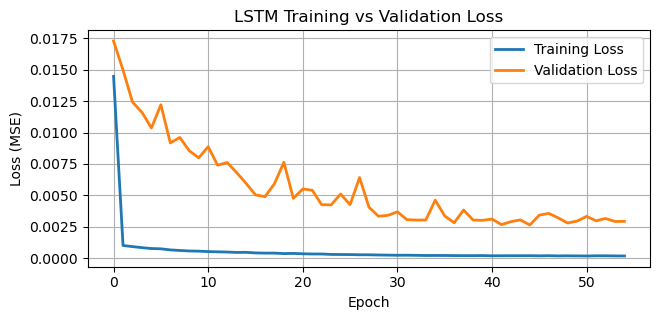

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

 Results for generalization to test data / Ergebnisse für Generalisierung:
  LSTM RMSE : 1.7163 USD
  LSTM R²   : 0.9891
Saved LSTM predictions to 'lstm_preds_retransformed.csv'


In [21]:
# ===============================================================================================
# === STEP 6: Build and train LSTM model / Konstruktion und Training des LSTM-Modells ===========
# ===============================================================================================
X_train_lstm = X_train.reshape(-1, number_of_delays, 1)
X_val_lstm   = X_val.reshape(  -1, number_of_delays, 1)
X_test_lstm  = X_test.reshape( -1, number_of_delays, 1)

lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(number_of_delays, 1)),
    Dropout(0.15),
    LSTM(32),
    Dense(1),
])

lstm_model.compile(optimizer=Adam(learning_rate=5e-4), loss="mse")

early_stop = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

history = lstm_model.fit(
    X_train_lstm, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val_lstm, y_val),
    callbacks=[early_stop],
    verbose=1,
)

# ===============================================================================================
# === STEP 7: LSTM training vs validation loss plot / Evaluation des LSTM-Modells ===============
# ===============================================================================================
plt.figure(figsize=(6.7, 3.3))
plt.plot(history.history["loss"],     label="Training Loss",   linewidth=2)
plt.plot(history.history["val_loss"], label="Validation Loss", linewidth=2)
plt.title("LSTM Training vs Validation Loss")
plt.xlabel("Epoch"); plt.ylabel("Loss (MSE)")
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

# ===============================================================================================
# === STEP 8: LSTM prediction & back-transform / Vorhersagen und Rücktransformation =============
# ===============================================================================================
y_pred_lstm = lstm_model.predict(X_test_lstm).flatten()
test_trend  = trend[val_end + number_of_delays:] if trend_used != "difference" else y_raw[val_end + number_of_delays:]

y_pred_lstm_usd = scaler.inverse_transform(y_pred_lstm.reshape(-1, 1)).flatten() + test_trend
y_true_lstm     = df["Close"].iloc[val_end + number_of_delays:].values

rmse_lstm = mean_squared_error(y_true_lstm, y_pred_lstm_usd, squared=False)
r2_lstm   = r2_score(y_true_lstm, y_pred_lstm_usd)

print("\n Results for generalization to test data / Ergebnisse für Generalisierung:")
print(f"  LSTM RMSE : {rmse_lstm:.4f} USD")
print(f"  LSTM R²   : {r2_lstm:.4f}")

lstm_re_df = pd.DataFrame({
    "Date": df["Date"].iloc[val_end + number_of_delays: val_end + number_of_delays + len(y_pred_lstm_usd)],
    "LSTM": y_pred_lstm_usd})
lstm_re_df.to_csv("lstm_preds_retransformed.csv", index=False)
print("Saved LSTM predictions to 'lstm_preds_retransformed.csv'")

In [22]:
# ====================================================================================================
# === STEP 9: ARIMA model with identical preprocessing / Training + Vorhersagen des ARIMA Modells=====
# ====================================================================================================
print("\nARIMA grid-search on train_norm data …")
arima_order = pm.auto_arima(
    train_norm,
    start_p=0, max_p=5,
    start_q=0, max_q=5,
    d=None,
    seasonal=False,
    stepwise=True,
    error_action="ignore",
    suppress_warnings=True,
).order
print(f"  → Selected order: {arima_order}")

model   = ARIMA(train_norm, order=arima_order)
results = model.fit()
print("Initial ARIMA model fit completed.")

for z in val_norm:
    results = results.append([z], refit=False)

first_pred_idx = val_end + number_of_delays
preds_norm = []

for z in test_norm[:number_of_delays]:
    results = results.append([z], refit=False)

for z in test_norm[number_of_delays:]:
    preds_norm.append(results.forecast()[0])
    results = results.append([z], refit=False)

dates_pred = df["Date"].iloc[first_pred_idx:].reset_index(drop=True)
preds_usd  = scaler.inverse_transform(np.array(preds_norm).reshape(-1, 1)).flatten()

if trend_used != "difference":
    preds_usd += trend[first_pred_idx:]
else:
    preds_usd += y_raw[first_pred_idx:]

y_true_test = df["Close"].iloc[first_pred_idx:].values
rmse_arima  = mean_squared_error(y_true_test, preds_usd, squared=False)
r2_arima    = r2_score(y_true_test, preds_usd)

print("\n Results for out-of-sample testing:")
print(f"  ARIMA RMSE : {rmse_arima:.4f} USD")
print(f"  ARIMA R²   : {r2_arima:.4f}")

arima_df = pd.DataFrame({"Date": dates_pred, "ARIMA": preds_usd})
arima_df.to_csv("arima_preds.csv", index=False)
print("Saved ARIMA predictions to 'arima_preds.csv'")


ARIMA grid-search on train_norm data …
  → Selected order: (3, 1, 3)


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Initial ARIMA model fit completed.

 Results for out-of-sample testing:
  ARIMA RMSE : 1.5211 USD
  ARIMA R²   : 0.9914
Saved ARIMA predictions to 'arima_preds.csv'


# Random Forest – Overview  

Random Forest (RF) is a *bagging ensemble* of $B$ independent decision trees $T_b$. Each tree is trained on a bootstrap sample of the training set, and at each split only a random subset of features is considered. In this way, the *correlation* between trees is reduced and the *overall variance* of the estimator is driven down.  

The prediction results from the mean (regression) or majority vote (classification) of the individual trees:  

$\hat{f}_{\mathrm{RF}}(x)=\frac{1}{B}\sum_{b=1}^{B} T_b(x)$.  

Through the aggregation step, the error variance drops compared to a single tree, while the bias remains almost unchanged. Thus, the model achieves a favorable **bias–variance trade-off**.

The RF is consistent: For $B\to\infty$, the ensemble error converges almost surely to its expected value. 

In addition, the RF offers natural *feature-importance* metrics based on the average impurity reduction across all trees.

Its learning complexity is $\mathcal{O}(B\,n\log n)$ with $n$ training points, but it can be parallelized exactly linearly across multiple cores. Since no differentiability is required, the RF can process both continuous and categorical input variables (features) without heavy preprocessing.  

### Typical Applications  

Random Forests are widely used in classification and regression, from medical diagnostics to credit scoring to remote sensing. Due to their robust performance on heterogeneous, high-dimensional data and the low hyperparameter effort, they are considered a “go-to” baseline in tabular settings.  

### Why apply it to (financial) time series? 

Although the RF does not model explicit time dynamics, lagged values, rolling statistics, or external macro factors can be fed in as features so that the ensemble captures nonlinear relationships in *levels* as well as *returns*. Thanks to its robustness to outliers and non-stationary distributions, it can be more stable than linear models in high-volatility phases.  

### Where does RF beat LSTM & ARIMA?  

*High dimensionality*: If the dataset contains many explanatory variables (macro data, technical indicators), RF scales better than ARIMA (a fundamentally univariate model) and requires less architecture tuning than LSTM.  
*Nonlinear interactions*: RF models arbitrary interactions without explicit specification, whereas ARIMA provides only linear filters and LSTM relies on sufficiently long training sequences.  
*Explainability*: Feature importance provides a transparent ranking of the drivers—a benefit over the “black-box” nature of LSTM. That is, with Random Forest you can quite directly see which input variables drive the prediction, and in an ordered ranking. 

### What does the following code do?

The block hooks up a **RandomForestRegressor** with $300$ trees to the same already differenced and scaled training features used for LSTM and ARIMA. After fitting, `rf_model.predict(X_test)` predicts the normalized prices, which are then transformed back into U.S. dollars using the original Min–Max scaler and the previously removed trend. Performance is evaluated with RMSE and $R^{2}$ against the real test prices, then stored in a DataFrame and saved as `rf_preds.csv`. This makes RF available as the third base component to be combined in the ensemble with LSTM and ARIMA.


# Random Forest – Überblick  

Random Forest (RF) ist ein *Bagging-Ensemble* aus $B$ voneinander unabhängigen Entscheidungsbäumen $T_b$. Jeder Baum wird auf einer Bootstrap-Stichprobe des Trainingssets trainiert und an jedem Split wird nur eine zufällige Teilmenge von Merkmalen betrachtet. Auf diese Weise wird die *Korrelation* zwischen den Bäumen reduziert und die *Gesamtvarianz* des Schätzers heruntergedrückt.  

Die Vorhersage ergibt sich aus dem Mittelwert (Regression) bzw. Mehrheitsvotum (Klassifikation) der Einzelbäume:  

$\hat{f}_{\mathrm{RF}}(x)=\frac{1}{B}\sum_{b=1}^{B} T_b(x)$.  

Durch den Aggregationsschritt sinkt die Fehlervarianz gegenüber einem einzelnen Baum, während der Bias nahezu unverändert bleibt. Damit realisiert das Modell einen günstigen **Bias-Varianz-Kompromiss**.

Der RF ist konsistent: Für $B\to\infty$ konvergiert der Ensemble-Fehler fast sicher gegen seinen Erwartungswert. 

Darüber hinaus bietet der RF natürliche *Feature-Importance*-Metriken, die auf der mittleren Impurity-Reduktion über alle Bäume basieren.

Seine Lernkomplexität beträgt $\mathcal{O}(B\,n\log n)$ bei $n$ Trainingspunkten, lässt sich aber durch Parallelisierung exakt linear auf mehrere Kerne verteilen. Da keine Differenzierbarkeit benötigt wird, kann der RF sowohl kontinuierliche als auch kategoriale Eingangsvariablen (Features) ohne aufwändige Vorverarbeitung verarbeiten.  

### Typische Einsatzgebiete  

Random Forests werden breit in Klassifikation und Regression eingesetzt, von medizinischer Diagnostik über Kreditscoring bis hin zu Remote-Sensing. Durch ihre robuste Leistung bei heterogenen, hochdimensionalen Daten und den geringen Hyperparameter-Aufwand gelten sie als „go-to“-Baseline in tabellarischen Settings.  

### Warum die Anwendung für (Finanz-)Zeitreihen? 

Obwohl der RF keine explizite Zeit-Dynamik modelliert, lassen sich verzögerte Werte (lags), rollende Statistiken oder externe Makrofaktoren als Features einspeisen, sodass das Ensemble nicht-lineare Zusammenhänge in *levels* wie auch *returns* erfasst . Dank seiner Robustheit gegenüber Ausreißern und nicht-stationären Verteilungen kann es in Hoch-Volatilitätsphasen stabiler sein als lineare Modelle.  

### Wo schlägt der RF LSTM & ARIMA?  

*Hohe Dimensionalität*: Enthält der Datensatz viele erklärende Variablen (Makrodaten, technische Indikatoren), skaliert der RF besser als ARIMA (univariates Grundmodell) und benötigt weniger Architektur-Tuning als LSTM.  
*Nicht-lineare Interaktionen*: Der RF modelliert beliebige Interaktionen ohne explizite Spezifikation, während ARIMA nur lineare Filter und LSTM auf genügend lange Trainingsreihen angewiesen ist.  
*Explainability*: Feature-Importance liefert eine transparente Rangfolge der Treiber – ein Vorteil gegenüber der „Black-Box“-Natur von LSTM. Das heißt, beim Random Forest kann man recht direkt sehen, welche Eingangsvariablen die Vorhersage treiben und das in einer geordneten Rangliste. 

### Was macht der folgende Code?

Der Block bindet einen **RandomForestRegressor** mit $300$ Bäumen an die gleichen, bereits differenzierten und skalierten Trainings-Features, die für LSTM und ARIMA genutzt wurden. Nach dem Fit sagt `rf_model.predict(X_test)` die normalisierten Preise voraus, die anschließend mittels des ursprünglichen Min-Max-Scalers und des zuvor entfernten Trends wieder in US-Dollar zurücktransformiert werden. Die Performance wird mit RMSE und $R^{2}$ gegen die reellen Testpreise evaluiert, dann in einem DataFrame gespeichert und als `rf_preds.csv` gespeichert. Damit steht RF als dritte Einzel-Komponente bereit, um im Ensemble mit LSTM und ARIMA kombiniert zu werden.  

In [25]:
# ================================================================================================================
# === STEP 10: Random-Forest pipeline with identical preprocessing  / Random Forrest Anpassung und Vorhersagen ===
# ================================================================================================================
print("\nRandom-Forest training …")
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_leaf=1,
    n_jobs=-1,
    random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf_norm = rf_model.predict(X_test)

rf_usd = scaler.inverse_transform(y_pred_rf_norm.reshape(-1, 1)).flatten()
if trend_used != "difference":
    y_pred_rf_usd = rf_usd + test_trend
else:
    y_pred_rf_usd = rf_usd + y_raw[val_end + number_of_delays:]

rmse_rf = mean_squared_error(y_true_lstm, y_pred_rf_usd, squared=False)
r2_rf   = r2_score(y_true_lstm, y_pred_rf_usd)

print(f"  RF   RMSE : {rmse_rf:.4f} USD")
print(f"  RF   R²   : {r2_rf:.4f}")

rf_df = pd.DataFrame({
    "Date": df["Date"].iloc[val_end + number_of_delays: val_end + number_of_delays + len(y_pred_rf_usd)],
    "RF": y_pred_rf_usd})
rf_df.to_csv("rf_preds.csv", index=False)
print("Saved RF predictions to 'rf_preds.csv'")


Random-Forest training …
  RF   RMSE : 3.2341 USD
  RF   R²   : 0.9612
Saved RF predictions to 'rf_preds.csv'


In [26]:
# ===============================================================================================
# === STEP 11: Merge all predictions & empirical data / Zusammenführung aller Daten =============
# ===============================================================================================
nke_df = pd.read_csv("NKE.csv", parse_dates=["Date"])[["Date", "Close"]]
nke_df = nke_df.dropna().sort_values("Date")
nke_df["Close"] = nke_df["Close"].interpolate(method="linear")

lstm_df  = pd.read_csv("lstm_preds_retransformed.csv", parse_dates=["Date"])
arima_df = pd.read_csv("arima_preds.csv",           parse_dates=["Date"])
rf_df    = pd.read_csv("rf_preds.csv",              parse_dates=["Date"])

merged = pd.merge(arima_df, lstm_df, on="Date", how="inner")
merged = pd.merge(merged, rf_df,  on="Date", how="inner")
merged = pd.merge(merged, nke_df, on="Date", how="inner")

In [27]:
# ===============================================================================================
# === STEP 12: Construction of the Ensemble / Konstruktion des Ensembles ========================
# ===============================================================================================
merged["Ensemble"] = (merged["LSTM"] + merged["ARIMA"] + merged["RF"]) / 3


 RMSE comparison:
  LSTM     : 1.7163 USD
  ARIMA    : 1.5211 USD
  RF       : 3.2341 USD
  Ensemble : 1.8657 USD

 R² comparison:
  LSTM     : 0.9891
  ARIMA    : 0.9914
  RF       : 0.9612
  Ensemble : 0.9871


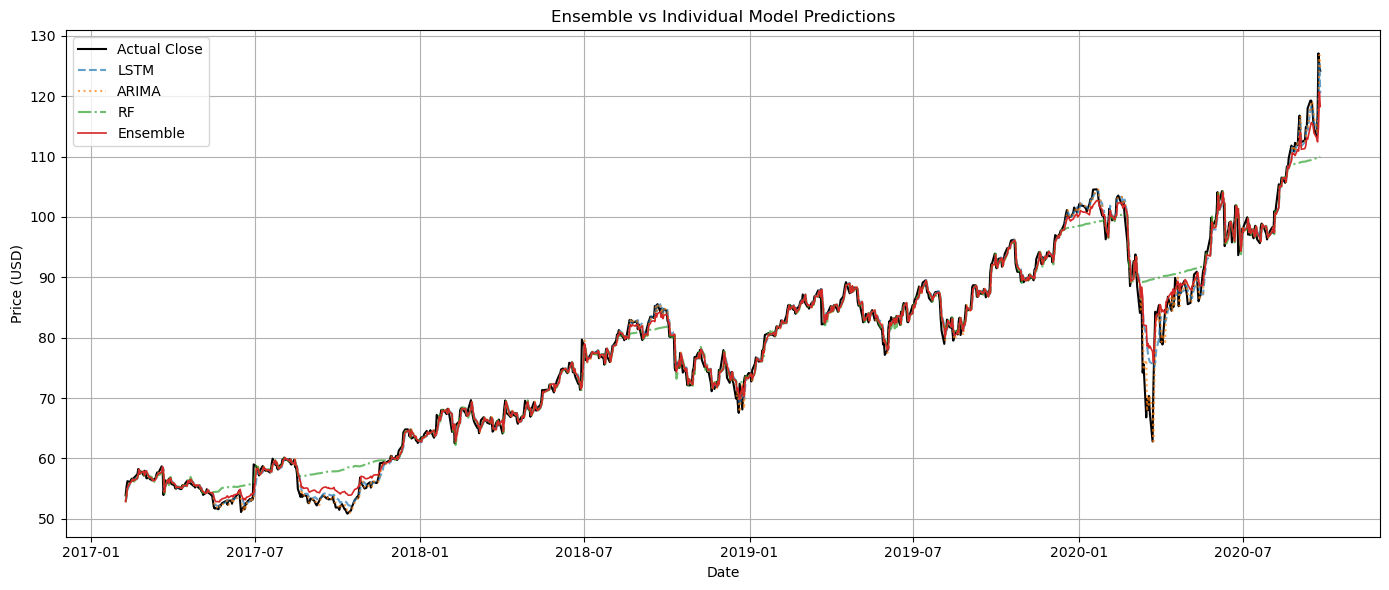

Saved merged predictions to 'merged_model_predictions.csv'


In [28]:
# =====================================================================================================
# === STEP 13: Evaluate all models via RMSE & R² / Evaluation aller Modelle über RMSE sowie R²-Score===
# =====================================================================================================
y_true        = merged["Close"]
rmse_lstm     = mean_squared_error(y_true, merged["LSTM"], squared=False)
rmse_arima    = mean_squared_error(y_true, merged["ARIMA"], squared=False)
rmse_rf       = mean_squared_error(y_true, merged["RF"],   squared=False)
rmse_ensemble = mean_squared_error(y_true, merged["Ensemble"], squared=False)

r2_lstm       = r2_score(y_true, merged["LSTM"])
r2_arima      = r2_score(y_true, merged["ARIMA"])
r2_rf         = r2_score(y_true, merged["RF"])
r2_ensemble   = r2_score(y_true, merged["Ensemble"])

print("\n RMSE comparison:")
print(f"  LSTM     : {rmse_lstm:.4f} USD")
print(f"  ARIMA    : {rmse_arima:.4f} USD")
print(f"  RF       : {rmse_rf:.4f} USD")
print(f"  Ensemble : {rmse_ensemble:.4f} USD")

print("\n R² comparison:")
print(f"  LSTM     : {r2_lstm:.4f}")
print(f"  ARIMA    : {r2_arima:.4f}")
print(f"  RF       : {r2_rf:.4f}")
print(f"  Ensemble : {r2_ensemble:.4f}")



# ===============================================================================================
# === STEP 14: Plot predictions  / Graphische Darstellung der Vorhersagen =======================
# ===============================================================================================
plt.figure(figsize=(14, 6))
plt.plot(merged["Date"], merged["Close"],    label="Actual Close", color="black")
plt.plot(merged["Date"], merged["LSTM"],     label="LSTM",  linestyle="--", alpha=0.7)
plt.plot(merged["Date"], merged["ARIMA"],    label="ARIMA", linestyle=":",  alpha=0.7)
plt.plot(merged["Date"], merged["RF"],       label="RF",    linestyle="-.", alpha=0.7)
plt.plot(merged["Date"], merged["Ensemble"], label="Ensemble", linewidth=1.2)
plt.title("Ensemble vs Individual Model Predictions")
plt.xlabel("Date"); plt.ylabel("Price (USD)")
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()



# ===============================================================================================
# === STEP 15: Export merged predictions / Speicherung der Vorhersagen ==========================
# ===============================================================================================
merged.to_csv("merged_model_predictions.csv", index=False)
print("Saved merged predictions to 'merged_model_predictions.csv'")

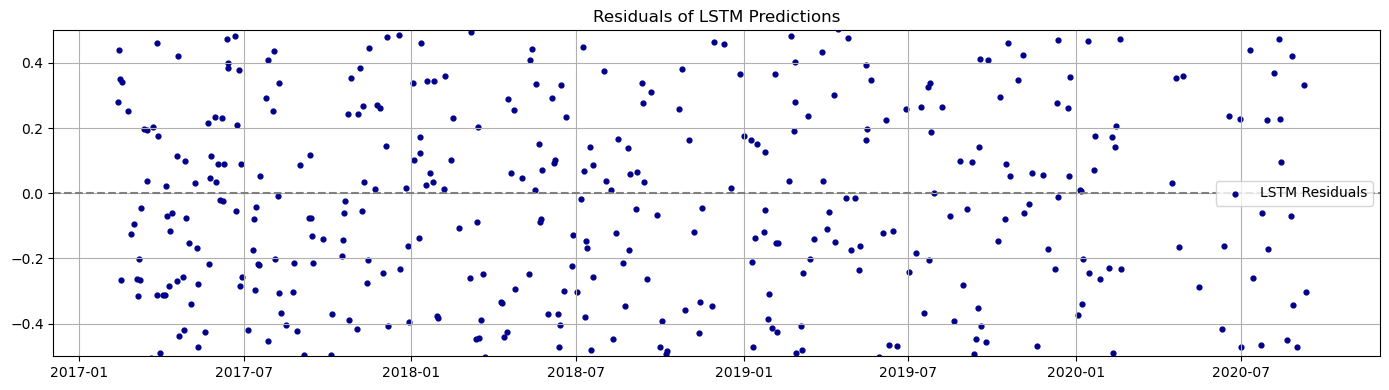

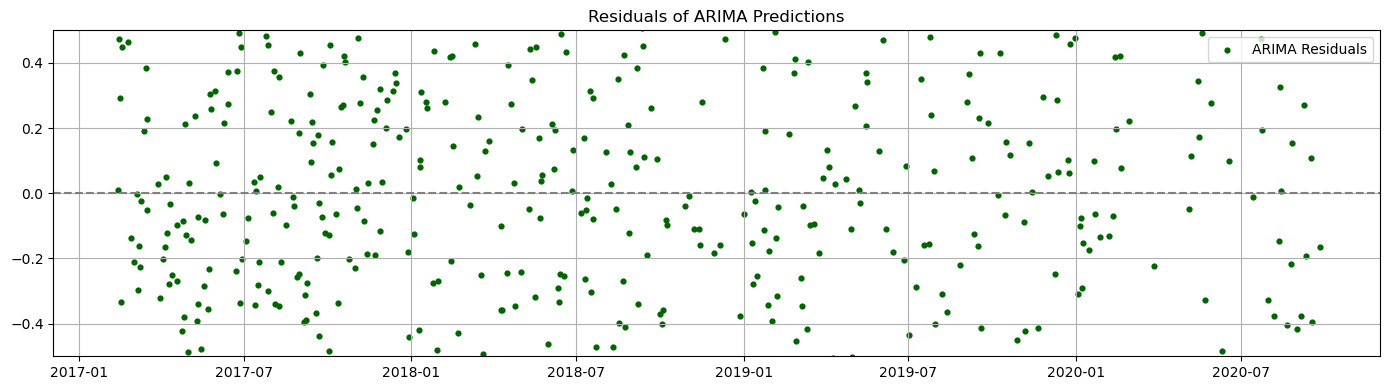

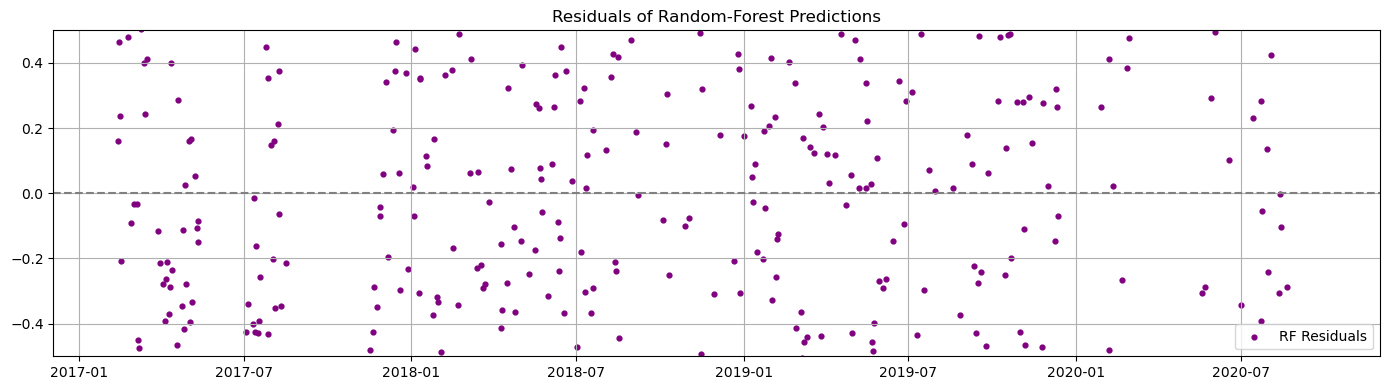

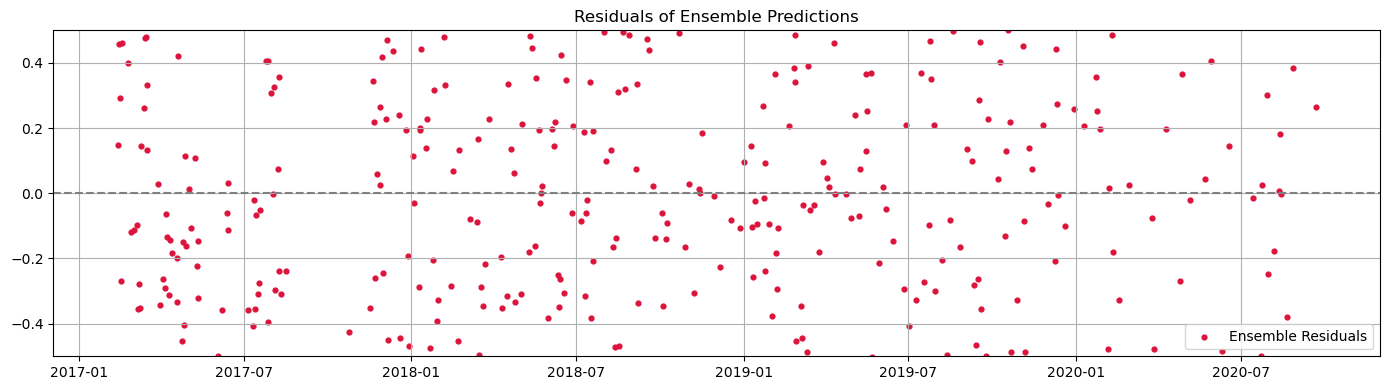


Naive LSTM Residual Analysis / Naive Residuenanalyse des LSTM-Modells:
  Mean of residuals : μ = -0.0807
  Std. deviation    : σ = 1.7153
  95% confidence interval : [-3.3620, 3.3620]
  876 out of 915 residuals (95.74%) within 95% confidence interval.

Naive ARIMA Residual Analysis / Naive Residuenanalyse des ARIMA-Modells:
  Mean of residuals : μ = 0.0326
  Std. deviation    : σ = 1.5215
  95% confidence interval : [-2.9822, 2.9822]
  870 out of 915 residuals (95.08%) within 95% confidence interval.

Naive RF Residual Analysis / Naive Residuenanalyse des RF-Modells:
  Mean of residuals : μ = -0.4344
  Std. deviation    : σ = 3.2065
  95% confidence interval : [-6.2848, 6.2848]
  879 out of 915 residuals (96.07%) within 95% confidence interval.

Naive Ensemble Residual Analysis / Naive Residuenanalyse des Ensemble-Modells:
  Mean of residuals : μ = -0.1608
  Std. deviation    : σ = 1.8598
  95% confidence interval : [-3.6452, 3.6452]
  881 out of 915 residuals (96.28%) within 95% conf

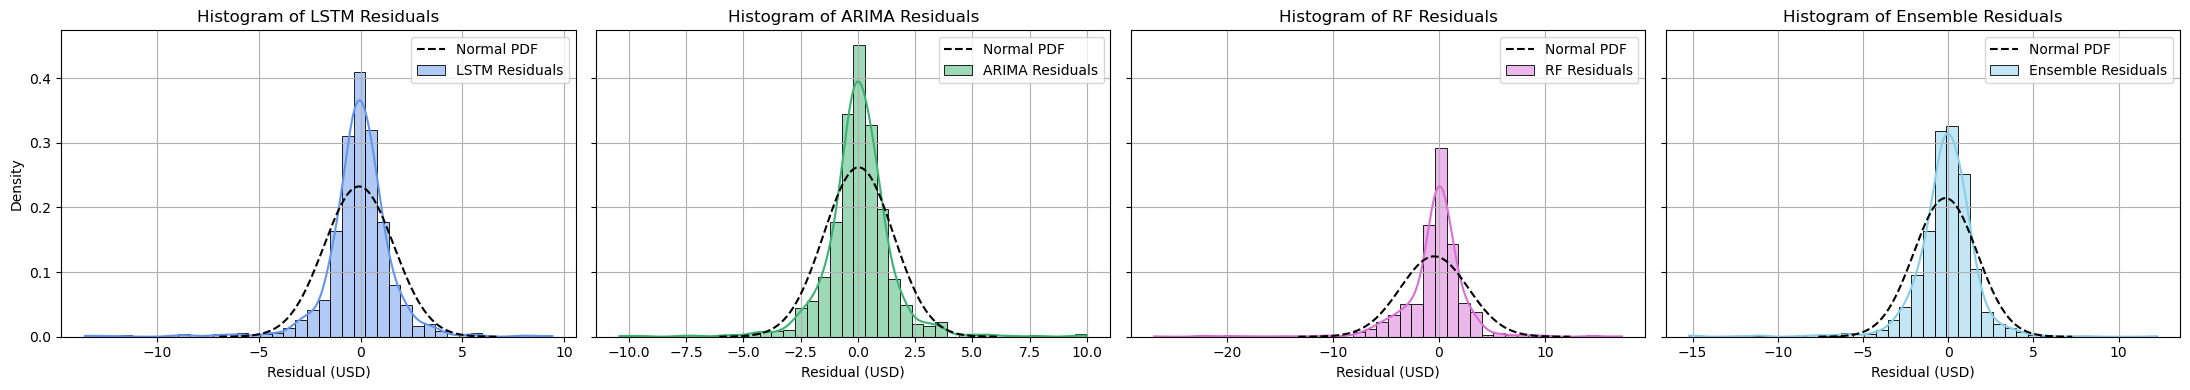

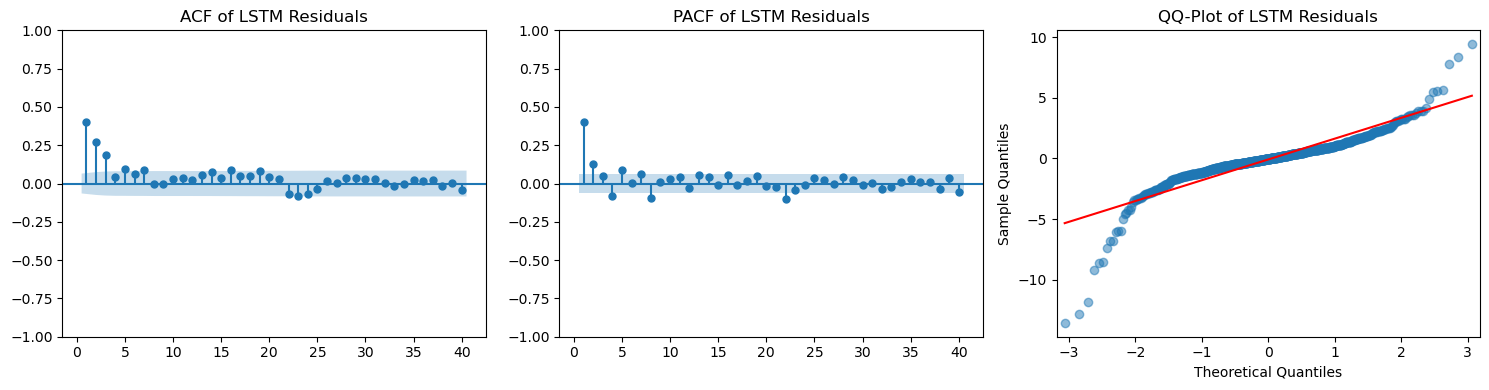

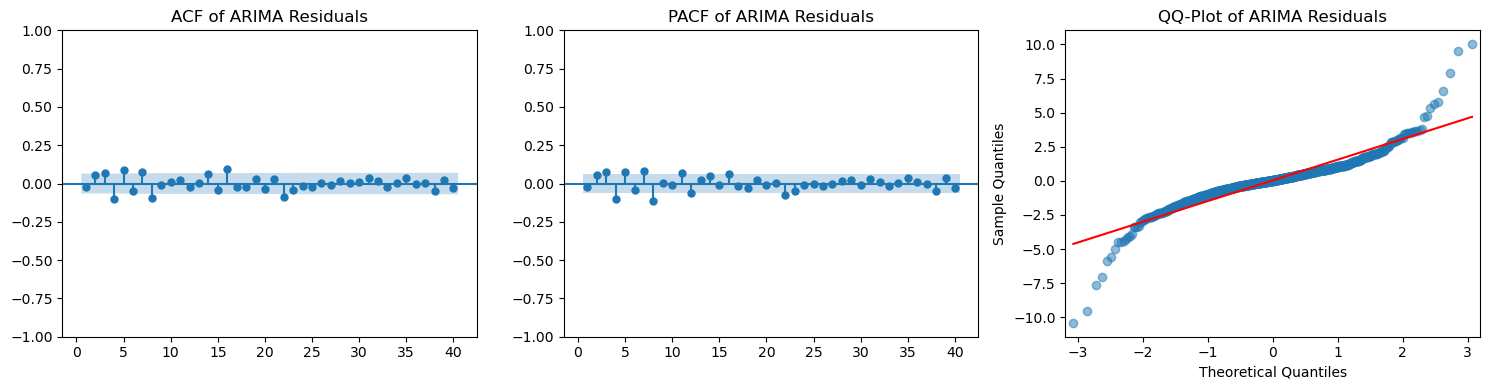

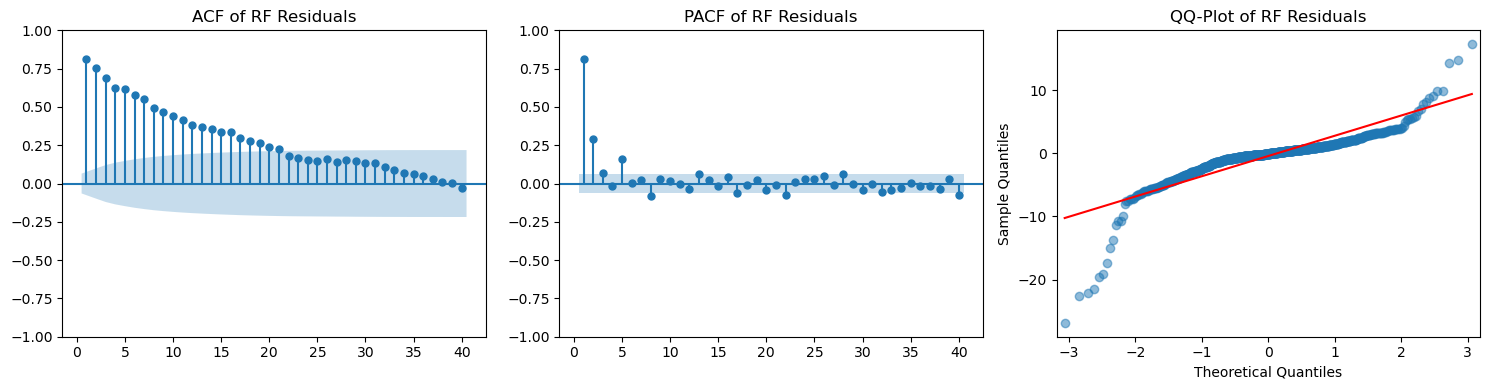

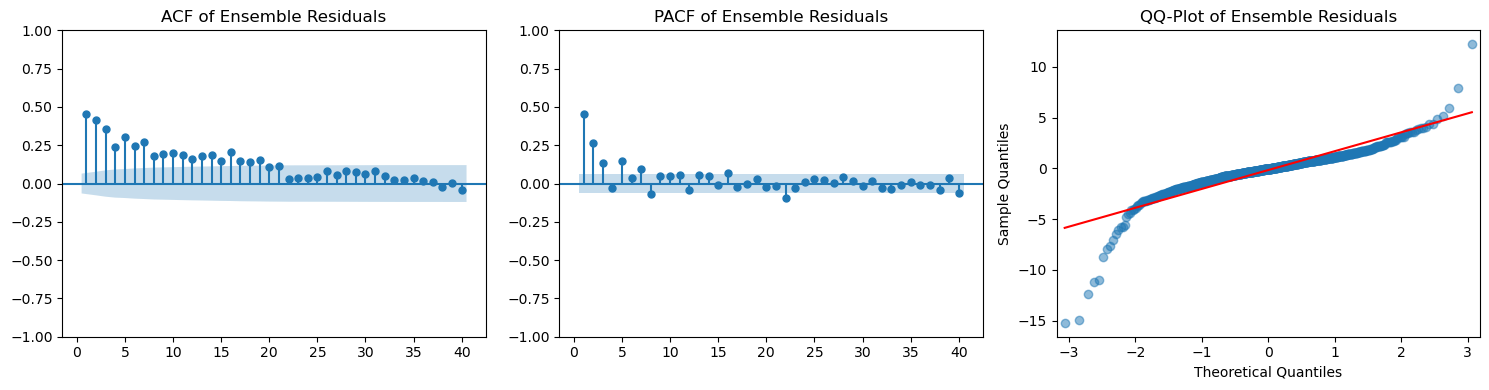


Ljung-Box test (LSTM residuals):
       lb_stat     lb_pvalue
10  267.717830  1.012194e-51
20  299.431507  1.055964e-51
30  319.163724  4.319492e-50
40  323.502441  4.888953e-46
→ Reject H₀: residuals exhibit significant autocorrelation.

Shapiro-Wilk test (LSTM residuals):
W = 0.8270, p = 0.0000
→ Reject H₀: residuals are **not** normally distributed.

Wilcoxon signed-rank test (median = 0, LSTM residuals):
W = 203494.0000, p = 0.4500
→ Fail to reject H₀: median of residuals does not differ from 0.

Ljung-Box test (ARIMA residuals):
      lb_stat  lb_pvalue
10  40.756458   0.000012
20  58.314140   0.000013
30  68.992396   0.000066
40  75.616118   0.000566
→ Reject H₀: residuals exhibit significant autocorrelation.

Shapiro-Wilk test (ARIMA residuals):
W = 0.8728, p = 0.0000
→ Reject H₀: residuals are **not** normally distributed.

Wilcoxon signed-rank test (median = 0, ARIMA residuals):
W = 200206.0000, p = 0.2434
→ Fail to reject H₀: median of residuals does not differ from 0.

Ljun

In [29]:
# ===============================================================================================
# === STEP 16: Residual analysis & diagnostics / Residuenanalyse & Diagnostik ==================
# ===============================================================================================

# Compute residuals / Berechnung der Residuen
lstm_residuals     = merged["Close"] - merged["LSTM"]
arima_residuals    = merged["Close"] - merged["ARIMA"]
rf_residuals       = merged["Close"] - merged["RF"]      
ensemble_residuals = merged["Close"] - merged["Ensemble"]

# --- Scatter plots of the residuals / Plots der Residuen ---------------------------------------
plt.figure(figsize=(14, 4))
plt.scatter(merged["Date"], lstm_residuals,  color="darkblue",   s=12, label="LSTM Residuals")
plt.axhline(0, linestyle="--", color="gray"); plt.ylim(-0.5, 0.5)
plt.title("Residuals of LSTM Predictions"); plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

plt.figure(figsize=(14, 4))
plt.scatter(merged["Date"], arima_residuals, color="darkgreen",  s=12, label="ARIMA Residuals")
plt.axhline(0, linestyle="--", color="gray"); plt.ylim(-0.5, 0.5)
plt.title("Residuals of ARIMA Predictions"); plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

plt.figure(figsize=(14, 4))
plt.scatter(merged["Date"], rf_residuals,    color="purple",     s=12, label="RF Residuals")   # ← NEW
plt.axhline(0, linestyle="--", color="gray"); plt.ylim(-0.5, 0.5)
plt.title("Residuals of Random-Forest Predictions"); plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

plt.figure(figsize=(14, 4))
plt.scatter(merged["Date"], ensemble_residuals, color="crimson", s=12, label="Ensemble Residuals")
plt.axhline(0, linestyle="--", color="gray"); plt.ylim(-0.5, 0.5)
plt.title("Residuals of Ensemble Predictions"); plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()


# --- Naive residual statistics (LSTM, ARIMA, RF and Ensemble) / Naive Statistik der Residuen --
def naive_stats(name, res):
    mean_r, std_r = res.mean(), res.std()
    lower, upper  = -1.96 * std_r, 1.96 * std_r
    within        = ((res >= lower) & (res <= upper)).sum()
    total         = len(res); pct = within / total * 100
    print(f"\nNaive {name} Residual Analysis / Naive Residuenanalyse des {name}-Modells:")
    print(f"  Mean of residuals : μ = {mean_r:.4f}")
    print(f"  Std. deviation    : σ = {std_r:.4f}")
    print(f"  95% confidence interval : [{lower:.4f}, {upper:.4f}]")
    print(f"  {within} out of {total} residuals ({pct:.2f}%) within 95% confidence interval.")

for tag, res in [("LSTM", lstm_residuals), ("ARIMA", arima_residuals),
                 ("RF",   rf_residuals),   ("Ensemble", ensemble_residuals)]:
    naive_stats(tag, res)


# --- Histograms of the residuals / Histogramme der Residuen ------------------------------------
fig, axes = plt.subplots(1, 4, figsize=(22, 4), sharey=True)
for ax, res, col, title in zip(
        axes,
        [lstm_residuals, arima_residuals, rf_residuals, ensemble_residuals],
        ["cornflowerblue", "mediumseagreen", "orchid", "skyblue"],
        ["LSTM", "ARIMA", "RF", "Ensemble"]):
    sns.histplot(res, bins=40, kde=True, stat="density", color=col, ax=ax, label=f"{title} Residuals")
    mu, sd = res.mean(), res.std()
    x_vals = np.linspace(mu - 4*sd, mu + 4*sd, 200)
    ax.plot(x_vals, norm.pdf(x_vals, mu, sd), linestyle="--", color="black", label="Normal PDF")
    ax.set_title(f"Histogram of {title} Residuals")
    ax.set_xlabel("Residual (USD)"); ax.legend(); ax.grid(True)
plt.tight_layout(); plt.show()


# --- ACF / PACF / QQ plots ---------------------------------------------------------------------
def triple_plot(res, title):
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    plot_acf(res,  lags=40, zero=False, alpha=0.05, ax=axes[0]); axes[0].set_title(f"ACF of {title} Residuals")
    plot_pacf(res, lags=40, zero=False, alpha=0.05, method="ywm", ax=axes[1]); axes[1].set_title(f"PACF of {title} Residuals")
    sm.qqplot(res, line="s", alpha=0.5, ax=axes[2]); axes[2].set_title(f"QQ-Plot of {title} Residuals")
    plt.tight_layout(); plt.show()

for tag, res in [("LSTM", lstm_residuals), ("ARIMA", arima_residuals),
                 ("RF", rf_residuals), ("Ensemble", ensemble_residuals)]:
    triple_plot(res, tag)


# --- Ljung-Box, Shapiro-Wilk & Wilcoxon tests --------------------------------------------------
def diag_tests(name, res):
    print(f"\nLjung-Box test ({name} residuals):")
    lb_df = acorr_ljungbox(res, lags=[10, 20, 30, 40], return_df=True)
    print(lb_df)
    if lb_df["lb_pvalue"].iloc[-1] < 0.05:
        print("→ Reject H₀: residuals exhibit significant autocorrelation.")
    else:
        print("→ Fail to reject H₀: residuals resemble white noise.")

    print(f"\nShapiro-Wilk test ({name} residuals):")
    W, p_sw = shapiro(res)
    print(f"W = {W:.4f}, p = {p_sw:.4f}")
    if p_sw < 0.05:
        print("→ Reject H₀: residuals are **not** normally distributed.")
    else:
        print("→ Fail to reject H₀: residuals appear normally distributed.")

    print(f"\nWilcoxon signed-rank test (median = 0, {name} residuals):")
    W_wilc, p_wilc = wilcoxon(res)
    print(f"W = {W_wilc:.4f}, p = {p_wilc:.4f}")
    if p_wilc < 0.05:
        print("→ Reject H₀: median of residuals differs significantly from 0.")
    else:
        print("→ Fail to reject H₀: median of residuals does not differ from 0.")

for tag, res in [("LSTM", lstm_residuals), ("ARIMA", arima_residuals),
                 ("RF", rf_residuals), ("Ensemble", ensemble_residuals)]:
    diag_tests(tag, res)

## Conclusion

The **Random Forest** under-performs the specialist time-series models: its RMSE ($3.23$ USD) is more than double that of the LSTM and ARIMA, and its R² ($0.96$) lags behind their $\sim 0.99$, indicating weaker out-of-sample explanatory power.

Residual diagnostics reinforce this point: RF errors show the largest standard deviation ($\sigma \approx 3.21$) and the strongest residual autocorrelation (Ljung-Box $p \approx 0$), signalling that the model (unsurprisingly) fails to capture important temporal dependence. Its residuals are also biased (Wilcoxon $p < 0.05$) and strongly non-normal (Shapiro $p \approx 0$), whereas ARIMA residuals remain median-unbiased and less dispersed.

The simple mean-stacking ensemble mitigates some individual weaknesses, but its RMSE ($1.87$ USD) and R² ($0.987$) sit between the best (ARIMA) and the worst (RF), showing that naïvely adding the RF actually drags average performance down. Ensemble residuals inherit significant autocorrelation, suggesting that combining forecasts without accounting for dependence structures does not rectify RF’s shortcomings.

Hence, in this setting a Random Forest offers little incremental value for one-step stock-price prediction and its inclusion in an equally weighted ensemble is not justified without more sophisticated weighting or feature engineering. In the following notebooks we will try more sophisticated extensions of the standard RF.

## Fazit

Der **Random Forest** schneidet gegenüber den spezialisierten Zeitreihenmodellen schlechter ab: sein RMSE (3,23 USD) ist mehr als doppelt so hoch wie das von LSTM und ARIMA, und sein R² (0,96) bleibt hinter deren ~0,99 zurück, was auf eine geringere Erklärungsstärke außerhalb der Stichprobe hindeutet.

Residuen­diagnostik untermauert dies: Die RF-Fehler weisen die größte Standardabweichung (σ ≈ 3,21) und die stärkste Residuenautokorrelation (Ljung-Box p ≈ 0) auf – ein Hinweis darauf, dass das Modell (wenig überraschend) wichtige zeitliche Abhängigkeiten nicht erfasst. Seine Residuen sind zudem verzerrt (Wilcoxon p < 0,05) und stark nicht normalverteilt (Shapiro p ≈ 0), während die ARIMA-Residuen median-unverzerrt und weniger streuend bleiben.

Das einfache, gleich gewichtete Ensemble mildert einige Schwächen, doch RMSE (1,87 USD) und R² (0,987) liegen zwischen dem besten (ARIMA) und dem schwächsten (RF) Modell – ein Hinweis, dass das naive Hinzufügen des RF die Durchschnittsleistung sogar verschlechtert. Die Ensemble-Residuen zeigen weiterhin signifikante Autokorrelation, was nahelegt, dass das Zusammenführen von Prognosen ohne Berücksichtigung der Abhängigkeitsstrukturen die RF-Defizite nicht behebt.

Daher liefert ein Random Forest in diesem Setup nur geringen zusätzlichen Nutzen für die Ein-Schritt-Vorhersage von Aktienkursen. Seine Aufnahme in ein gleich gewichtetetes Ensemble ist ohne ausgefeiltere Gewichtung oder Feature-Engineering nicht gerechtfertigt. In folgenden notebooks werden wir Erweiterungen zum standard RF ausprobieren.
